# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    units = "metric"
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        
        weather_json = city_weather.json()
        #print(weather_json)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]
        
        #print("lat is : "+str(city_lat))

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | fisterra
Processing Record 4 of Set 1 | ust-nera
Processing Record 5 of Set 1 | yelizovo
Processing Record 6 of Set 1 | al wajh
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | fort bragg
Processing Record 9 of Set 1 | fada
Processing Record 10 of Set 1 | tanrake village
City not found. Skipping...
Processing Record 11 of Set 1 | pisco
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | gadzhiyevo
Processing Record 14 of Set 1 | visegrad
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | colonia
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | zangguy
City not found. Skipping...
Processing Record 21 of Set 1 | pandan
Processing Rec

Processing Record 42 of Set 4 | knyaze-volkonskoye
Processing Record 43 of Set 4 | quellon
Processing Record 44 of Set 4 | noyabrsk
Processing Record 45 of Set 4 | alesund
Processing Record 46 of Set 4 | amga
Processing Record 47 of Set 4 | brandon
Processing Record 48 of Set 4 | ulan bator
Processing Record 49 of Set 4 | kayangel
Processing Record 0 of Set 5 | fortuna
Processing Record 1 of Set 5 | ashland
Processing Record 2 of Set 5 | midvagur
Processing Record 3 of Set 5 | ceeldheer
Processing Record 4 of Set 5 | tura
Processing Record 5 of Set 5 | khanty-mansiysk
Processing Record 6 of Set 5 | walvis bay
Processing Record 7 of Set 5 | turtas
Processing Record 8 of Set 5 | mogocha
Processing Record 9 of Set 5 | saldanha
Processing Record 10 of Set 5 | sona
Processing Record 11 of Set 5 | palopo
Processing Record 12 of Set 5 | wanning
Processing Record 13 of Set 5 | coalinga
Processing Record 14 of Set 5 | beaufort west
Processing Record 15 of Set 5 | at-bashi
Processing Record 16 o

Processing Record 38 of Set 8 | hami
Processing Record 39 of Set 8 | tommot
Processing Record 40 of Set 8 | ash shafa
City not found. Skipping...
Processing Record 41 of Set 8 | tolanaro
Processing Record 42 of Set 8 | copiapo
Processing Record 43 of Set 8 | varash
City not found. Skipping...
Processing Record 44 of Set 8 | veinticinco de mayo
Processing Record 45 of Set 8 | bulan
Processing Record 46 of Set 8 | arinos
Processing Record 47 of Set 8 | uturoa
Processing Record 48 of Set 8 | oamaru
Processing Record 49 of Set 8 | sampacho
Processing Record 0 of Set 9 | paita
Processing Record 1 of Set 9 | galliano
Processing Record 2 of Set 9 | nuku'alofa
Processing Record 3 of Set 9 | nizhneudinsk
Processing Record 4 of Set 9 | khanpur
Processing Record 5 of Set 9 | kalevala
Processing Record 6 of Set 9 | ishigaki
Processing Record 7 of Set 9 | khandyga
Processing Record 8 of Set 9 | novodvinsk
Processing Record 9 of Set 9 | chervonopartyzans'k
Processing Record 10 of Set 9 | toga villag

Processing Record 25 of Set 12 | isale
Processing Record 26 of Set 12 | el quebrachal
Processing Record 27 of Set 12 | colares
Processing Record 28 of Set 12 | johnstown
Processing Record 29 of Set 12 | sisimiut
Processing Record 30 of Set 12 | arno
Processing Record 31 of Set 12 | bechar
Processing Record 32 of Set 12 | todos santos
Processing Record 33 of Set 12 | taksimo
Processing Record 34 of Set 12 | sault ste. marie
Processing Record 35 of Set 12 | shahin dezh
Processing Record 36 of Set 12 | eydhafushi
Processing Record 37 of Set 12 | gagarin shahri
City not found. Skipping...
Processing Record 38 of Set 12 | geroskipou
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.16,85,10,3.26,PN,1697503505
1,blackmans bay,-43.0167,147.3167,16.52,48,11,0.45,AU,1697503506
2,fisterra,42.9049,-9.2629,22.23,77,100,13.00,ES,1697503506
3,ust-nera,64.5667,143.2000,-15.99,94,53,1.34,RU,1697503506
4,yelizovo,53.1873,158.3805,9.08,66,75,8.05,RU,1697503506


In [6]:
# Export the City_Data into a csv
output_data = "../output_data/cities.csv"
city_data_df.to_csv(output_data, index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.16,85,10,3.26,PN,1697503505
1,blackmans bay,-43.0167,147.3167,16.52,48,11,0.45,AU,1697503506
2,fisterra,42.9049,-9.2629,22.23,77,100,13.00,ES,1697503506
3,ust-nera,64.5667,143.2000,-15.99,94,53,1.34,RU,1697503506
4,yelizovo,53.1873,158.3805,9.08,66,75,8.05,RU,1697503506


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

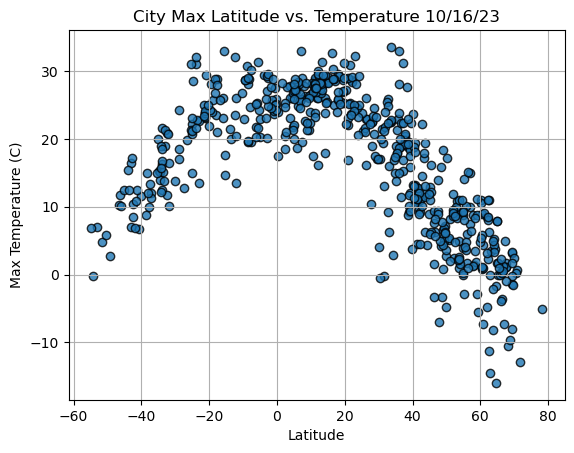

In [8]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

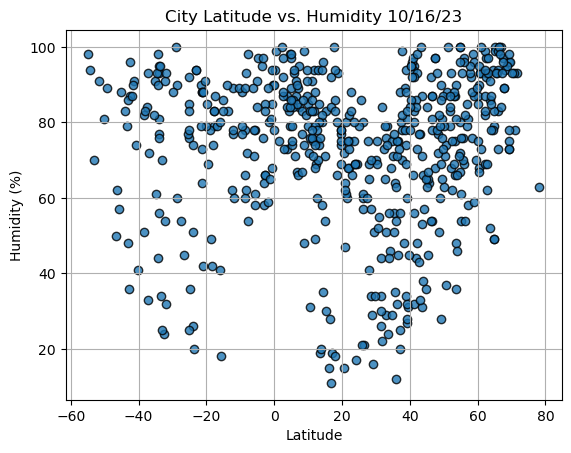

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

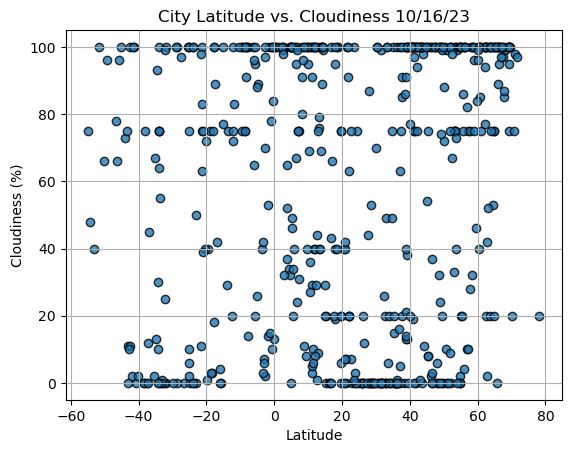

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

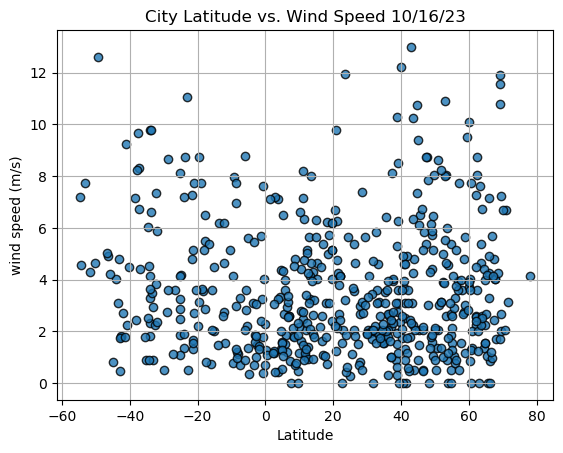

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("wind speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,x_label, y_label):
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(min(x_values),max(y_values)),fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {r_value}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,fisterra,42.9049,-9.2629,22.23,77,100,13.00,ES,1697503506
3,ust-nera,64.5667,143.2000,-15.99,94,53,1.34,RU,1697503506
4,yelizovo,53.1873,158.3805,9.08,66,75,8.05,RU,1697503506
5,al wajh,26.2455,36.4525,22.97,60,0,2.06,SA,1697503431
6,isafjordur,66.0755,-23.1240,0.35,83,100,3.29,IS,1697503507


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.16,85,10,3.26,PN,1697503505
1,blackmans bay,-43.0167,147.3167,16.52,48,11,0.45,AU,1697503506
9,pisco,-13.7000,-76.2167,20.03,83,75,6.17,PE,1697503461
10,invercargill,-46.4000,168.3500,11.68,62,66,4.92,NZ,1697503508
14,west island,-12.1568,96.8225,25.99,89,75,6.17,CC,1697503510


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8582208715749545


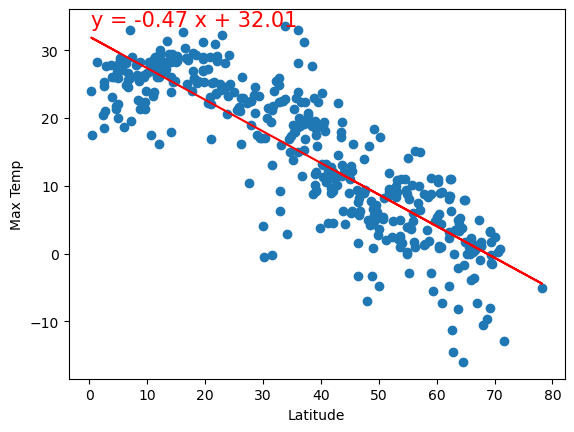

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, "Latitude", 'Max Temp')

The r-value is: 0.7877524362214683


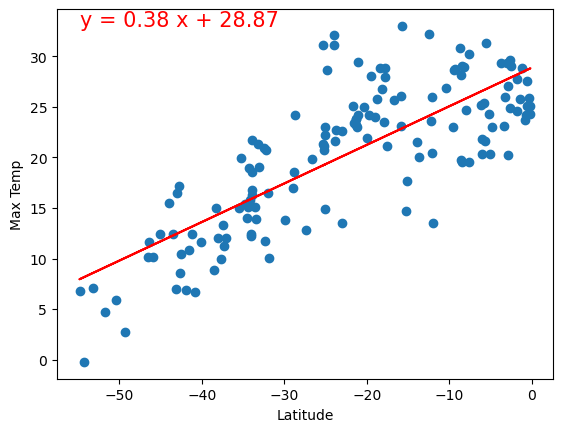

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Latitude", 'Max Temp')

**Discussion about the linear relationship:** 
##There is a negative correlation between temperature and latitude with a r-value -0.8582208715749545 on Northern Hemisphere.
##There is a positive correlation between temperature and latitude with a r-value 0.7877524362214683 on Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13570630341169035


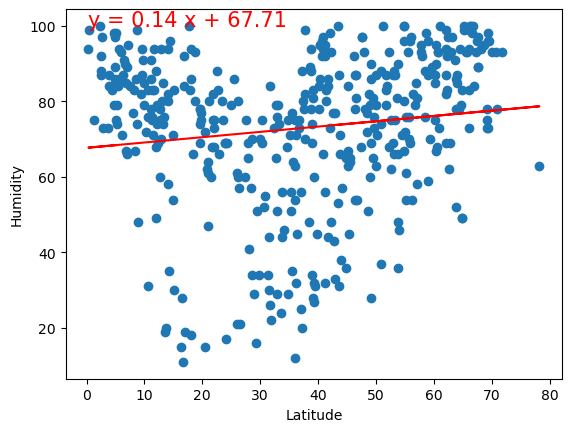

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, "Latitude", 'Humidity')

The r-value is: 0.05775852720096774


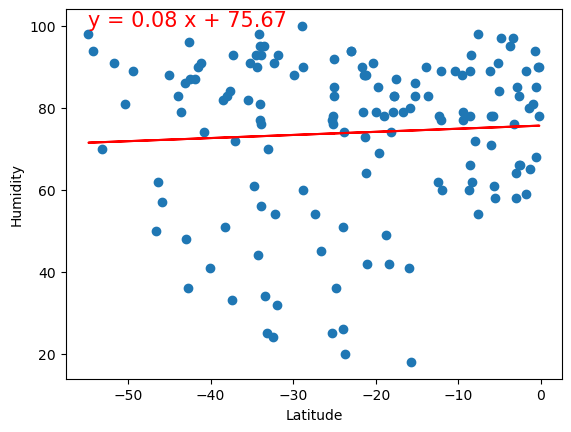

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, "Latitude", 'Humidity')

**Discussion about the Humidity vs. Latitude linear relationship:** 
We can see a strong positive correlation between humidity and latitude with a r-value of 0.13570630341169035 on Northern Hemisphere.
We can also see positive correlation between humidity and latitude with a r-value of 0.05775852720096774 on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17240194002305764


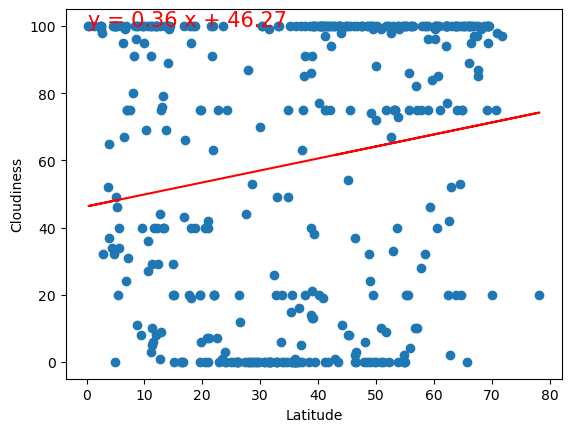

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values,"Latitude", 'Cloudiness')

The r-value is: 0.1586791899623187


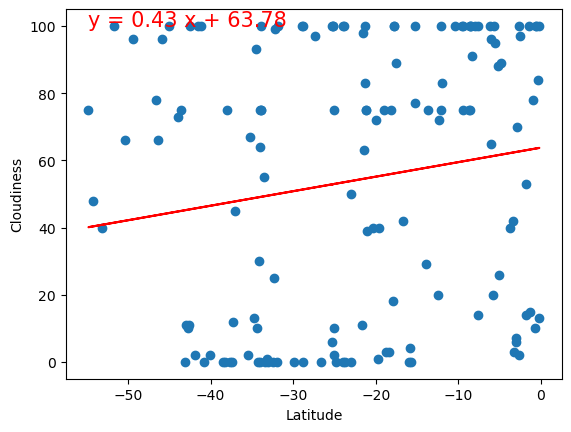

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values,"Latitude", 'Cloudiness')

**Discussion about the Cloudiness vs. Latitude linear relationship:** 
There is a positive correlation between cloudiness and latitude with a r-value of 0.17240194002305764 on Northern Hemisphere.
There is a relatively strong positive correlation between cloudiness and latitude with r-value  of 0.1586791899623187 on Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13111907196304914


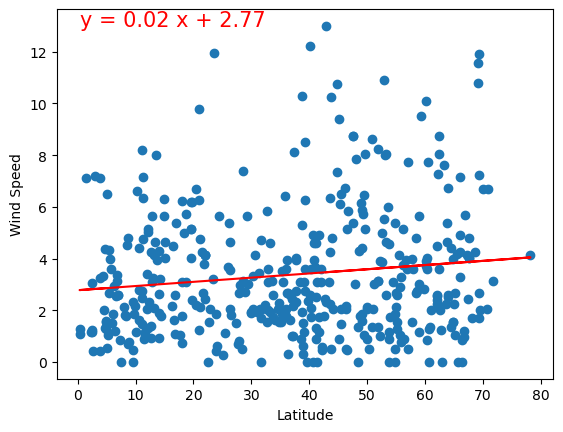

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values,"Latitude", 'Wind Speed')

The r-value is: -0.25015962817012866


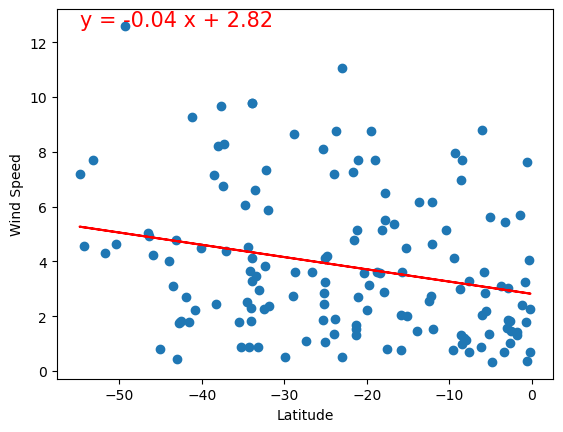

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values,"Latitude", 'Wind Speed')

**Discussion about the Wind Speed vs. Latitude linear relationship:** 
There is a lesser correlation between wind speed and latitude with a r-value of 0.13111907196304914 on Northern Hemisphere.
There is a negative correlation between wind speed and latitude with a r-value of -0.25015962817012866 on Southern Hemisphere.